Project Objective 
1. Does Customer Experience have an impact on growth of Aviato’s annual subscription revenue? If yes, which Customer Experience metrics influence annual subscription revenue growth?

2. What is the potential impact created (additional $ value) by providing better Customer Experience?

Context
Aviato is a new Operating System company that sells its OS to companies on a subscription basis (per
user). In return, customers get an advanced AI based OS that simplifies multiple tasks. Currently, they are
trying to evaluate if providing a better customer experience leads to higher revenue growth.


Get the data 

In [67]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Read the 'Aviato Customer Information' tab
aviato_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='Aviato Customer Information')

# Read the 'NPS' tab
nps_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='NPS')

# Read the 'Events' tab
events_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='Events')

# Read the 'VersionUpgrades' tab
vu_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='VersionUpgrades')

# Read the 'PartnerInvolvement' tab
PI_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='PartnerInvolvement')

# Read the 'Product Adoption' tab
PA_df = pd.read_excel('/Users/zacw/Downloads/Aviato Case Study - Customer Revenue and CX Parameter Data (1).xlsx', sheet_name='Product Adoption')


In [69]:
aviato_df.head(10)

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue
0,CUST0001,Very Large Enterprise,Government,18-Q1,423414,779081.76
1,CUST0002,Large Enterprise,Retail and Wholesale,18-Q4,425820,489693.00
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,19-Q4,309382,238224.14
3,CUST0004,Commercial,Retail and Wholesale,19-Q1,290835,380993.85
4,CUST0005,Commercial,Manufacturing and Natural Resources,19-Q2,386024,594476.96
5,CUST0006,SME,Manufacturing and Natural Resources,19-Q2,116604,124766.28
6,CUST0007,Very Large Enterprise,Government,18-Q1,734711,830223.43
7,CUST0008,SME,Business and Consumer Services,17-Q1,75695,137764.90
8,CUST0009,Very Large Enterprise,Communications Media and Services,19-Q3,771245,1349678.75
9,CUST0010,SME,Energy and Utilities,18-Q4,225103,382675.10


In [94]:
# Get column names as a list
column_names = events_df.columns.tolist()

# Display the list of column names
print(column_names)


['Customer Number', 'Knowledge Event', 'NowForum Event', 'OtherEvents Event']


In [122]:
# Get column names as a list
column_names = vu_df.columns.tolist()

# Display the list of column names
print(column_names)

['Customer Number', 'Number of Version Upgrades by the Customer since they started']


In [140]:
# Get column names as a list
column_names = aviato_df.columns.tolist()

# Display the list of column names
print(column_names)

['Customer Number', 'Customer Segment', 'Customer Industry', 'Customer Start Quarter with Aviato', 'Starting Yearly Subscription Revenue ', 'Current (20-Q3) Yearly Subscription Revenue', 'quarters_since_start', 'years_since_start', 'annual_revenue_growth', 'annual_revenue_growth_perc', 'annual_revenue_growth_perc_adj', 'annual_revenue_growth_adj']


In [111]:
# Get column names as a list
column_names = PA_df.columns.tolist()

# Display the list of column names
print(column_names)

['Customer Number', 'Product Adoption']


In [71]:
nps_df.head(10)

,Customer Number,2017 NPS,2018 NPS,2019 NPS
0,CUST0001,NaN,9.0,9
1,CUST0002,NaN,10.0,8
2,CUST0003,NaN,NaN,4
3,CUST0004,NaN,NaN,10
4,CUST0005,NaN,NaN,9
5,CUST0006,NaN,NaN,7
6,CUST0007,NaN,10.0,8
7,CUST0008,10.0,10.0,9
8,CUST0009,NaN,NaN,9
9,CUST0010,NaN,9.0,10


In [72]:
# Min value how far does the data trace back to..
min_value = aviato_df['Customer Start Quarter with Aviato'].min()
print({min_value})

{'17-Q1'}


In [73]:
# Max value
max_value = aviato_df['Customer Start Quarter with Aviato'].max()
print({max_value})

{'19-Q4'}


In [74]:
# Convert 'customer_start_quarter' to a datetime format
aviato_df['Customer Start Quarter with Aviato'] = pd.to_datetime(df['Customer Start Quarter with Aviato'], format='%y-Q%m')

# Calculate the number of quarters from starting quarter to 2020 Q3
aviato_df['quarters_since_start'] = ((2020 - aviato_df['Customer Start Quarter with Aviato'].dt.year) * 4 +
                              (3 - aviato_df['Customer Start Quarter with Aviato'].dt.quarter))

# Calculate the corresponding number of years
aviato_df['years_since_start'] = aviato_df['quarters_since_start'] / 4

# Display the DataFrame with the new columns
#print(aviato_df[['Customer Start Quarter with Aviato', 'quarters_since_start', 'years_since_start']])
aviato_df.head()

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50


In [75]:
    # Calculate annual revenue growth in dollars 
    aviato_df['annual_revenue_growth'] = (aviato_df['Current (20-Q3) Yearly Subscription Revenue'] - aviato_df['Starting Yearly Subscription Revenue '])
                                                                                                                     
    # Calculate annual revenue growth percentage
    aviato_df['annual_revenue_growth_perc'] = ((aviato_df['Current (20-Q3) Yearly Subscription Revenue'] - aviato_df['Starting Yearly Subscription Revenue ']) / aviato_df['Starting Yearly Subscription Revenue ']) * 100
 
    # Calculate annual revenue growth percentage / years_since_start
    aviato_df['annual_revenue_growth_perc_adj'] = aviato_df['annual_revenue_growth_perc']/aviato_df['years_since_start']
    
     # Calculate annual revenue growth / years_since_start
    aviato_df['annual_revenue_growth_adj'] = aviato_df['annual_revenue_growth']/aviato_df['years_since_start']
    
    # Display the result
    #print(aviato_df[['Customer Number', 'year', 'quarter', 'annual_revenue_growth_perc']])
    aviato_df.head()

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth_adj
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50,355667.76,84.0,33.600000,142267.104
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,63873.00,15.0,6.666667,28388.000
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-71157.86,-23.0,-18.400000,-56926.288
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,90158.85,31.0,20.666667,60105.900
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,208452.96,54.0,36.000000,138968.640


In [76]:
# Convert NPS columns to numeric (if not already numeric)
nps_df['2017NPS'] = pd.to_numeric(nps_df['2017 NPS'], errors='coerce')
nps_df['2018NPS'] = pd.to_numeric(nps_df['2018 NPS'], errors='coerce')
nps_df['2019NPS'] = pd.to_numeric(nps_df['2019 NPS'], errors='coerce')

# Calculate average NPS score for each customer excluding NA values
nps_df['average_nps'] = nps_df[['2017 NPS', '2018 NPS', '2019 NPS']].mean(axis=1, skipna=True)

# Display the result
#print(nps_df[['Customer Number', 'average_nps']])
nps_df.head()

,Customer Number,2017 NPS,2018 NPS,2019 NPS,2017NPS,2018NPS,2019NPS,average_nps
0,CUST0001,NaN,9.0,9,NaN,9.0,9,9.0
1,CUST0002,NaN,10.0,8,NaN,10.0,8,9.0
2,CUST0003,NaN,NaN,4,NaN,NaN,4,4.0
3,CUST0004,NaN,NaN,10,NaN,NaN,10,10.0
4,CUST0005,NaN,NaN,9,NaN,NaN,9,9.0


In [61]:
# Merge DataFrames on 'customer number'
merged_df = pd.merge(aviato_df, nps_df[['Customer Number', 'average_nps']], on='Customer Number', how='left')

# Display the merged DataFrame
merged_df.head(20)

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth,annual_revenue_growth_adj,average_nps
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50,84.0,33.600000,355667.76,142267.104000,9.000000
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,15.0,6.666667,63873.00,28388.000000,9.000000
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-23.0,-18.400000,-71157.86,-56926.288000,4.000000
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,31.0,20.666667,90158.85,60105.900000,10.000000
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,54.0,36.000000,208452.96,138968.640000,9.000000
5,CUST0006,SME,Manufacturing and Natural Resources,2019-02-01,116604,124766.28,6,1.50,7.0,4.666667,8162.28,5441.520000,7.000000
6,CUST0007,Very Large Enterprise,Government,2018-01-01,734711,830223.43,10,2.50,13.0,5.200000,95512.43,38204.972000,9.000000
7,CUST0008,SME,Business and Consumer Services,2017-01-01,75695,137764.90,14,3.50,82.0,23.428571,62069.90,17734.257143,9.666667
8,CUST0009,Very Large Enterprise,Communications Media and Services,2019-03-01,771245,1349678.75,6,1.50,75.0,50.000000,578433.75,385622.500000,9.000000
9,CUST0010,SME,Energy and Utilities,2018-04-01,225103,382675.10,9,2.25,70.0,31.111111,157572.10,70032.044444,9.500000


In [80]:
# Summary Statistics
print(merged_df.describe())

       Starting Yearly Subscription Revenue   \
count                            1000.000000   
mean                           367212.884000   
std                            237082.979954   
min                             40498.000000   
25%                            178847.250000   
50%                            308331.000000   
75%                            506218.500000   
max                            994388.000000   

       Current (20-Q3) Yearly Subscription Revenue  quarters_since_start  \
count                                 1.000000e+03           1000.000000   
mean                                  7.254374e+05              9.978000   
std                                   2.939349e+06              3.281506   
min                                  -7.822851e+06              5.000000   
25%                                   2.165477e+05              6.000000   
50%                                   3.994108e+05             10.000000   
75%                                

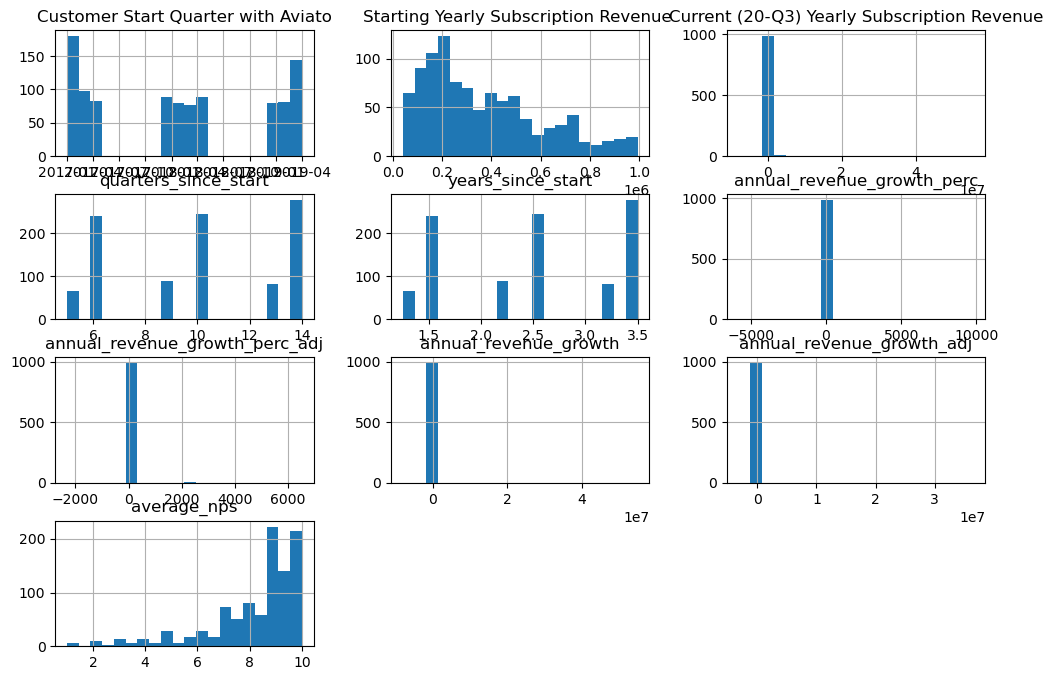

In [81]:
import matplotlib.pyplot as plt

merged_df.hist(bins=20, figsize=(12, 8))
plt.show()

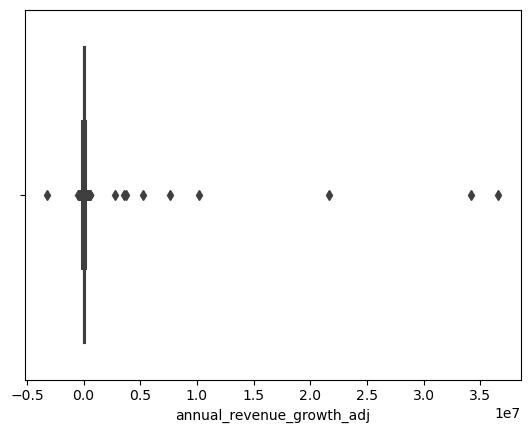

In [82]:
# Use box plots to identify potential outliers in numerical variables
import seaborn as sns

sns.boxplot(data=merged_df, x='annual_revenue_growth_adj')
plt.show()

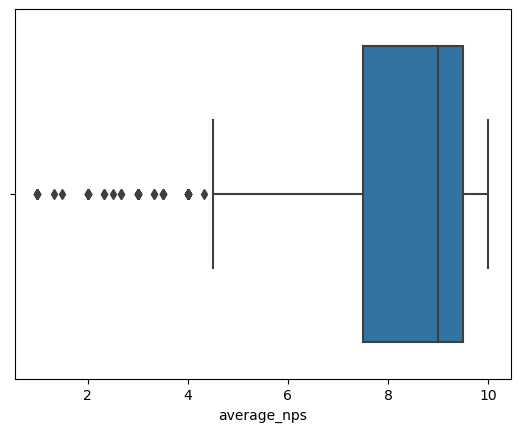

In [85]:
sns.boxplot(data=merged_df, x='average_nps')
plt.show()

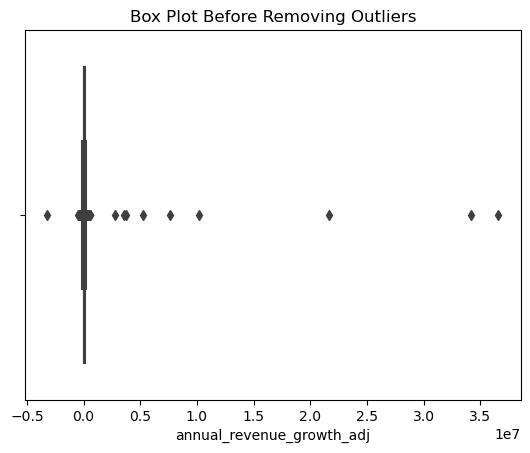

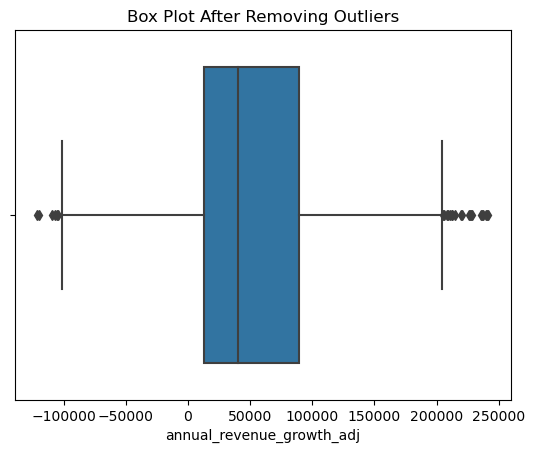

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'your_dataframe' with a column 'column_name'
# Replace 'column_name' with the actual column you want to analyze

# Step 1: Create a box plot to identify outliers
sns.boxplot(x='annual_revenue_growth_adj', data=merged_df)
plt.title('Box Plot Before Removing Outliers')
plt.show()

# Step 2: Calculate the IQR
Q1 = merged_df['annual_revenue_growth_adj'].quantile(0.25)
Q3 = merged_df['annual_revenue_growth_adj'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to exclude outliers
filtered_merged_df = merged_df[(merged_df['annual_revenue_growth_adj'] >= lower_bound) & (merged_df['annual_revenue_growth_adj'] <= upper_bound)]

# Step 5: Create a box plot after removing outliers
sns.boxplot(x='annual_revenue_growth_adj', data=filtered_merged_df)
plt.title('Box Plot After Removing Outliers')
plt.show()

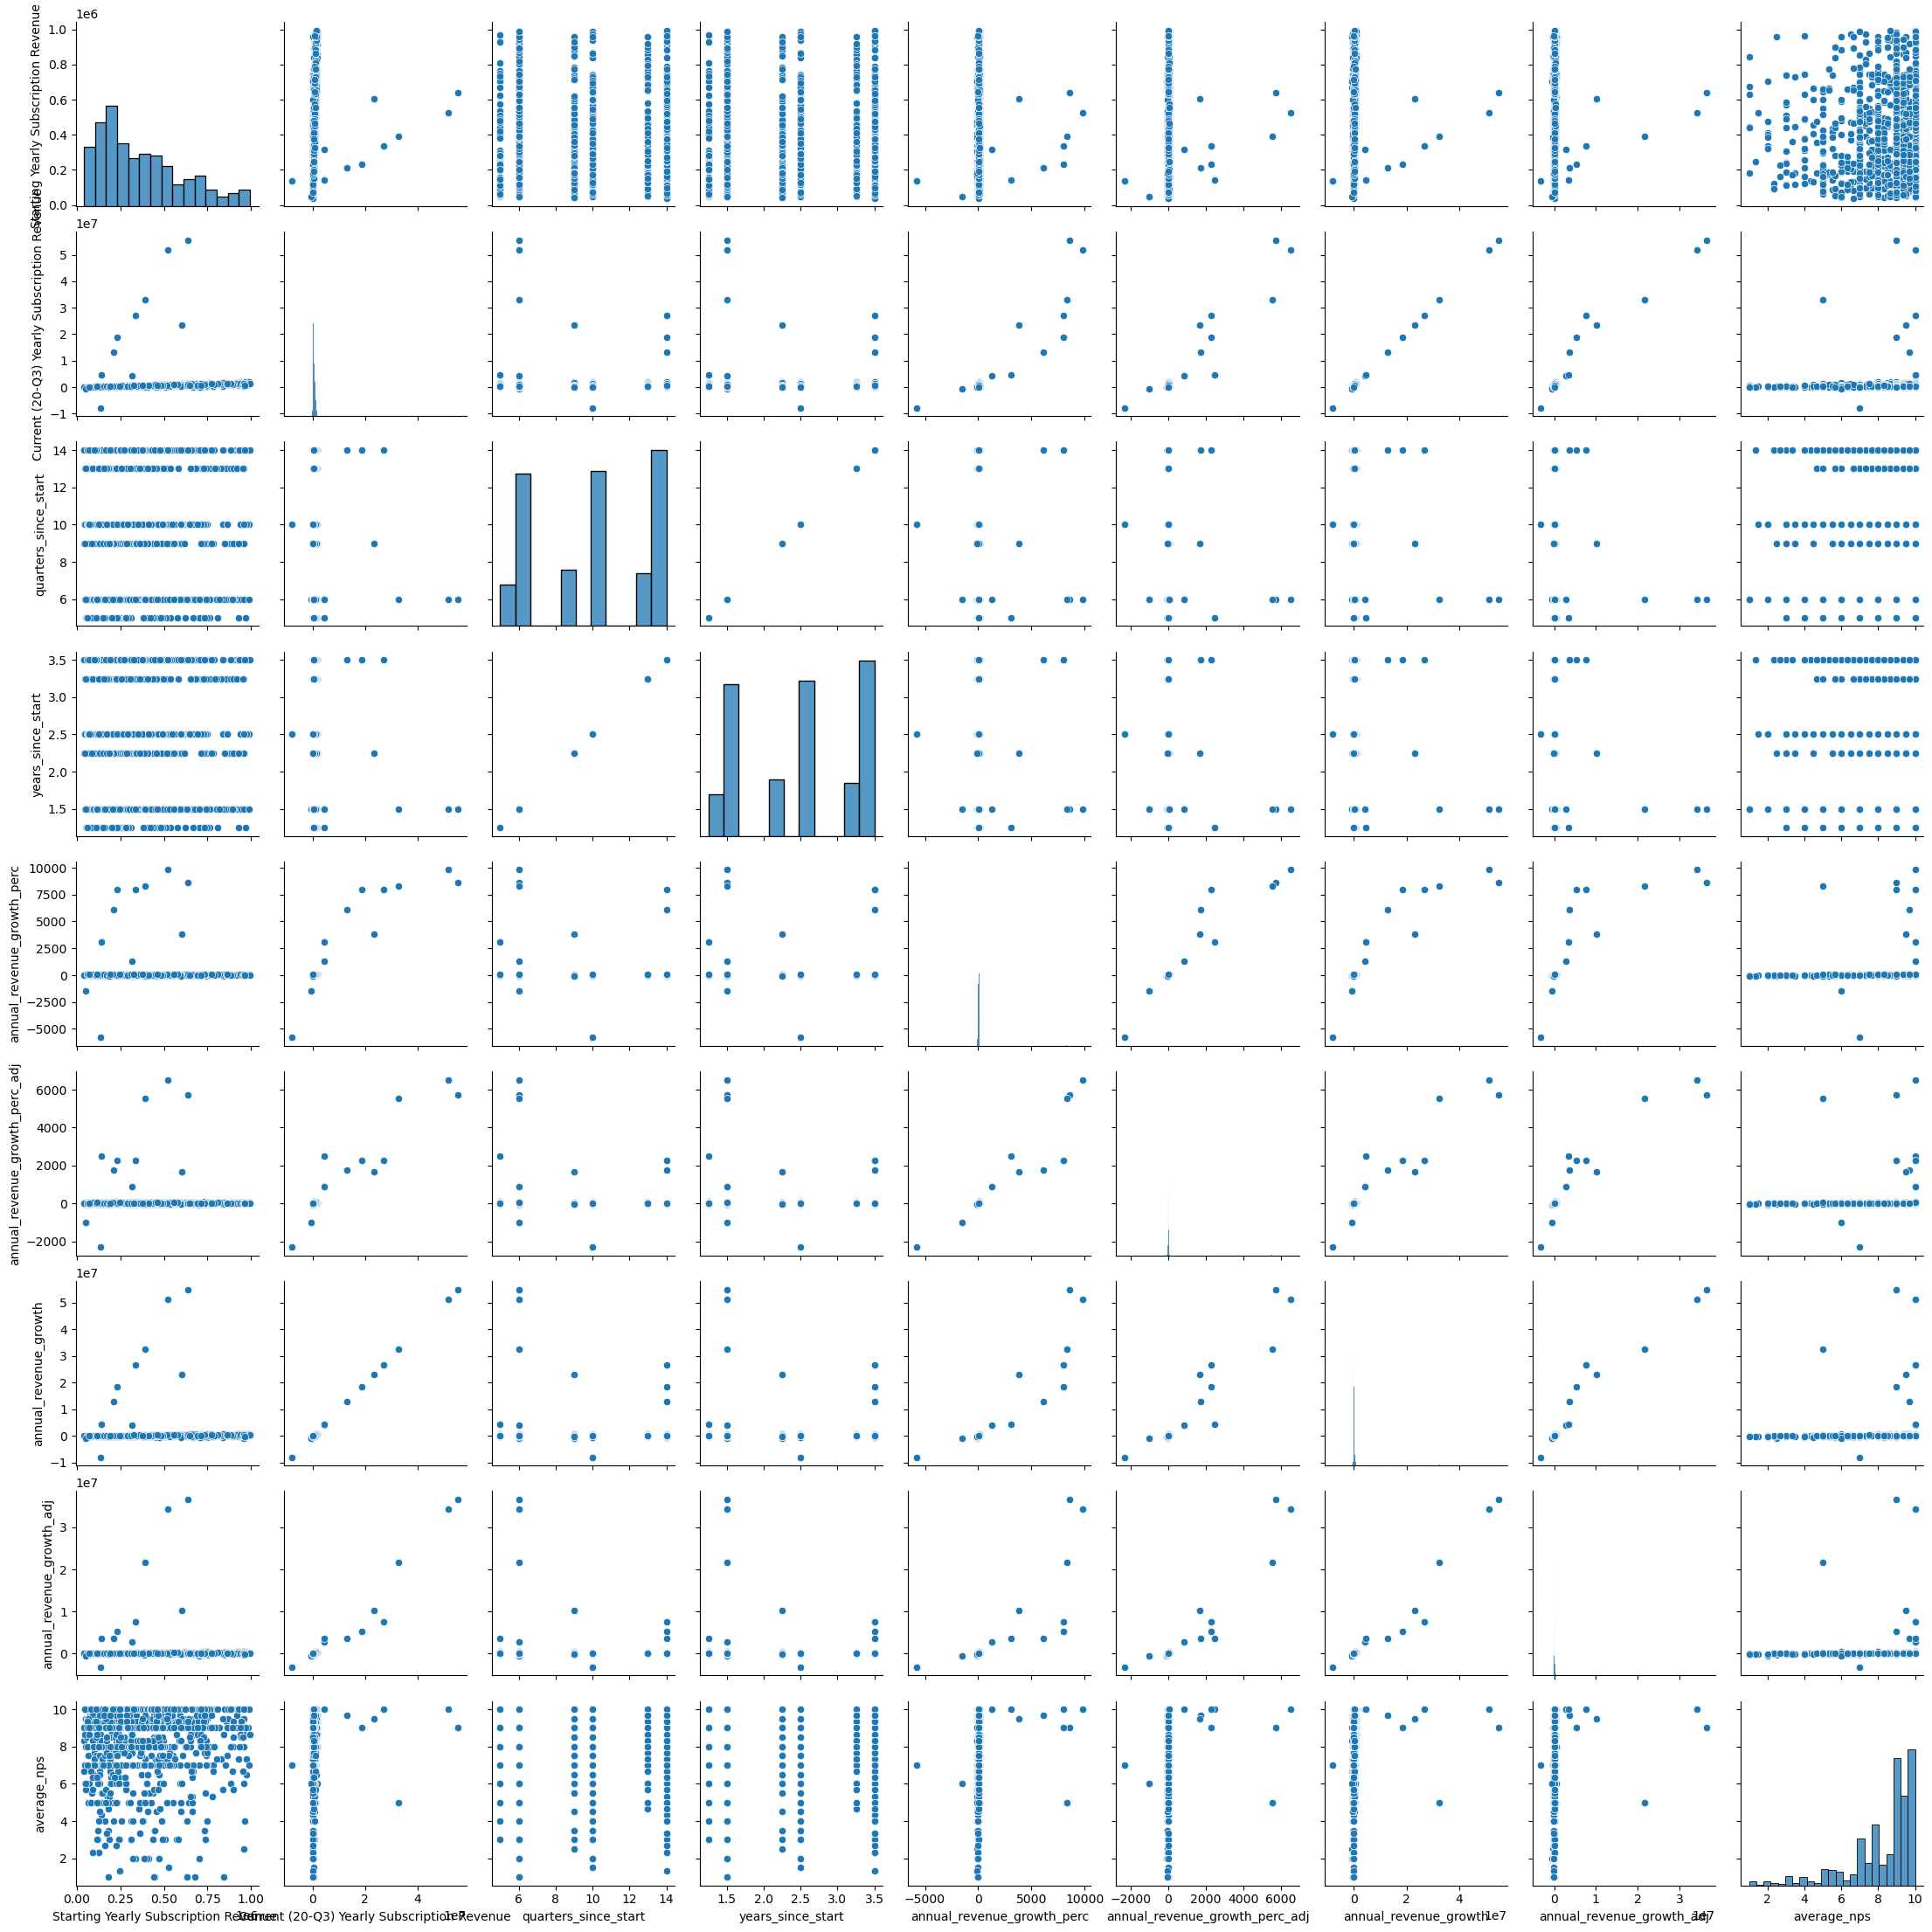

In [83]:
sns.pairplot(merged_df)
plt.show()

In [92]:
# Merge Events DataFrames on 'customer number'
merged_df_events = pd.merge(filtered_merged_df, events_df[['Customer Number', 'Knowledge Event', 'NowForum Event', 'OtherEvents Event']], on='Customer Number', how='left')

# Display the merged DataFrame
merged_df_events.head(10)

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth,annual_revenue_growth_adj,average_nps,Knowledge Event,NowForum Event,OtherEvents Event
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50,84.0,33.600000,355667.76,142267.104000,9.000000,Not Attended,Attended,Not Attended
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,15.0,6.666667,63873.00,28388.000000,9.000000,Attended,Not Attended,Not Attended
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-23.0,-18.400000,-71157.86,-56926.288000,4.000000,Not Attended,Attended,Attended
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,31.0,20.666667,90158.85,60105.900000,10.000000,Attended,Not Attended,Not Attended
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,54.0,36.000000,208452.96,138968.640000,9.000000,Attended,Attended,Attended
5,CUST0006,SME,Manufacturing and Natural Resources,2019-02-01,116604,124766.28,6,1.50,7.0,4.666667,8162.28,5441.520000,7.000000,Not Attended,Not Attended,Attended
6,CUST0007,Very Large Enterprise,Government,2018-01-01,734711,830223.43,10,2.50,13.0,5.200000,95512.43,38204.972000,9.000000,Not Attended,Attended,Attended
7,CUST0008,SME,Business and Consumer Services,2017-01-01,75695,137764.90,14,3.50,82.0,23.428571,62069.90,17734.257143,9.666667,Not Attended,Not Attended,Attended
8,CUST0010,SME,Energy and Utilities,2018-04-01,225103,382675.10,9,2.25,70.0,31.111111,157572.10,70032.044444,9.500000,Attended,Attended,Not Attended
9,CUST0011,SME,Manufacturing and Natural Resources,2018-03-01,200131,228149.34,10,2.50,14.0,5.600000,28018.34,11207.336000,7.000000,Attended,Attended,Not Attended


In [105]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'Knowledge Event', 'NowForum Event', and 'OtherEvents Event' are binary categorical variables

# Create a DataFrame with the relevant columns
df = merged_df_events[['annual_revenue_growth_adj', 'Knowledge Event', 'NowForum Event', 'OtherEvents Event']]

# Map categorical values to numeric (0 or 1)
df['Knowledge Event'] = df['Knowledge Event'].map({'Not Attended': 0, 'Attended': 1})
df['NowForum Event'] = df['NowForum Event'].map({'Not Attended': 0, 'Attended': 1})
df['OtherEvents Event'] = df['OtherEvents Event'].map({'Not Attended': 0, 'Attended': 1})

# Drop rows with missing values
df = df.dropna()

# Calculate point-biserial correlation and p-values
corr_knowledge, p_value_knowledge = pointbiserialr(df['OtherEvents Event'], df['annual_revenue_growth_adj'])
print(f"Point-biserial correlation between OtherEvents Event and annual_revenue_growth_adj: {corr_knowledge:.4f}, p-value: {p_value_knowledge:.4f}")



Point-biserial correlation between OtherEvents Event and annual_revenue_growth_adj: -0.0445, p-value: 0.1798


/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2245552140.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Knowledge Event'] = df['Knowledge Event'].map({'Not Attended': 0, 'Attended': 1})
/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2245552140.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NowForum Event'] = df['NowForum Event'].map({'Not Attended': 0, 'Attended': 1})
/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2245552140.py:13: Sett

/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2510627216.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_merged_df.corr()


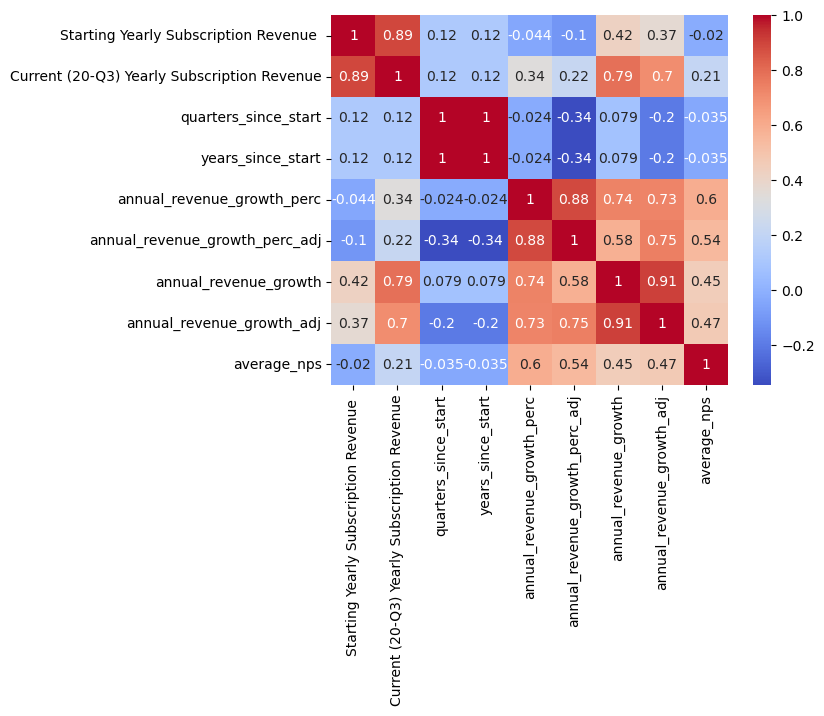

In [87]:
corr_matrix = filtered_merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [106]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Assuming you have a DataFrame 'df' with the provided dataset
# Replace 'df' with the actual name of your DataFrame

# Drop rows with missing values in 'average_nps' or 'annual_revenue_growth_perc'
filtered_merged_df = filtered_merged_df.dropna(subset=['average_nps', 'annual_revenue_growth_adj'])

# Correlation analysis
correlation_coefficient, p_value = pearsonr(filtered_merged_df['average_nps'], filtered_merged_df['annual_revenue_growth_adj'])

# Display the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Regression analysis
X = sm.add_constant(filtered_merged_df['average_nps'])
y = filtered_merged_df['annual_revenue_growth_adj']

model = sm.OLS(y, X).fit()
print(model.summary())


Pearson Correlation Coefficient: 0.46911344893621687
P-value: 4.3182911910210315e-51
                                OLS Regression Results                               
Dep. Variable:     annual_revenue_growth_adj   R-squared:                       0.220
Model:                                   OLS   Adj. R-squared:                  0.219
Method:                        Least Squares   F-statistic:                     256.8
Date:                       Thu, 25 Jan 2024   Prob (F-statistic):           4.32e-51
Time:                               17:31:02   Log-Likelihood:                -11290.
No. Observations:                        912   AIC:                         2.258e+04
Df Residuals:                            910   BIC:                         2.259e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|

In [149]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Assuming you have a DataFrame 'df' with the provided dataset
# Replace 'df' with the actual name of your DataFrame

# Filter the data for "Customer Industry = Government"
filtered_government_df = filtered_merged_df[filtered_merged_df['Customer Industry'] == 'Transportation']

# Drop rows with missing values in 'average_nps' or 'annual_revenue_growth_perc'
filtered_government_df = filtered_government_df.dropna(subset=['average_nps', 'annual_revenue_growth_adj'])

# Check if there are at least two data points for correlation analysis
if len(filtered_government_df) >= 2:
    # Correlation analysis
    correlation_coefficient, p_value = pearsonr(filtered_government_df['average_nps'], filtered_government_df['annual_revenue_growth_adj'])

    # Display the correlation coefficient and p-value
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")

    # Regression analysis
    X = sm.add_constant(filtered_government_df['average_nps'])
    y = filtered_government_df['annual_revenue_growth_adj']

    model = sm.OLS(y, X).fit()
    print(model.summary())
else:
    print("Insufficient data points for correlation and regression analysis in 'Government' industry.")


Pearson Correlation Coefficient: 0.42180981917050375
P-value: 0.00018180680108592336
                                OLS Regression Results                               
Dep. Variable:     annual_revenue_growth_adj   R-squared:                       0.178
Model:                                   OLS   Adj. R-squared:                  0.167
Method:                        Least Squares   F-statistic:                     15.58
Date:                       Thu, 25 Jan 2024   Prob (F-statistic):           0.000182
Time:                               20:52:50   Log-Likelihood:                -921.82
No. Observations:                         74   AIC:                             1848.
Df Residuals:                             72   BIC:                             1852.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|

In [139]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Filter the data for "Customer Industry = Government"
filtered_sme_df = filtered_merged_df[filtered_merged_df['Customer Industry'] == 'Government']

# Check if the filtered DataFrame is not empty
if not filtered_sme_df.empty:
    # Drop rows with missing values in 'average_nps' or 'annual_revenue_growth_adj'
    filtered_sme_df = filtered_sme_df.dropna(subset=['average_nps', 'annual_revenue_growth_adj'])

    # Check if the DataFrame is still not empty after dropping NaNs
    if not filtered_sme_df.empty:
        # Correlation analysis
        correlation_coefficient, p_value = pearsonr(filtered_sme_df['average_nps'], filtered_sme_df['annual_revenue_growth_adj'])

        # Display the correlation coefficient and p-value
        print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
        print(f"P-value: {p_value}")

        # Regression analysis
        X = sm.add_constant(filtered_sme_df['average_nps'])
        y = filtered_sme_df['annual_revenue_growth_adj']

        model = sm.OLS(y, X).fit()
        print(model.summary())
    else:
        print("Filtered DataFrame is empty after dropping missing values.")
else:
    print("No data for 'Customer Industry = Government' in the original DataFrame.")



No data for 'Customer Industry = Government' in the original DataFrame.


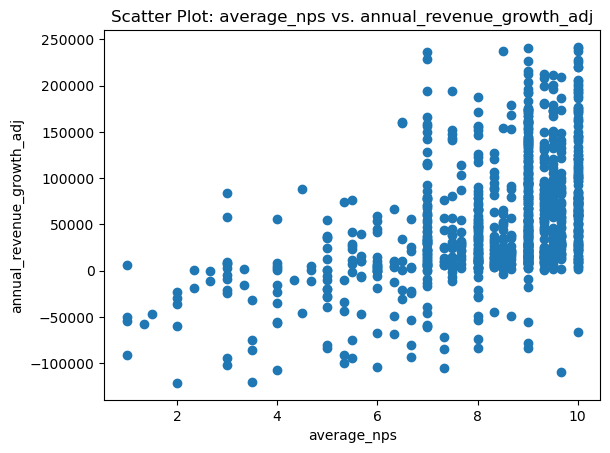

In [89]:
import matplotlib.pyplot as plt

# Drop rows with missing values in 'average_nps' or 'annual_revenue_growth_perc'
filtered_merged_df = filtered_merged_df.dropna(subset=['average_nps', 'annual_revenue_growth_adj'])

# Create a scatter plot
plt.scatter(filtered_merged_df['average_nps'], filtered_merged_df['annual_revenue_growth_adj'])
plt.title('Scatter Plot: average_nps vs. annual_revenue_growth_adj')
plt.xlabel('average_nps')
plt.ylabel('annual_revenue_growth_adj')
plt.show()

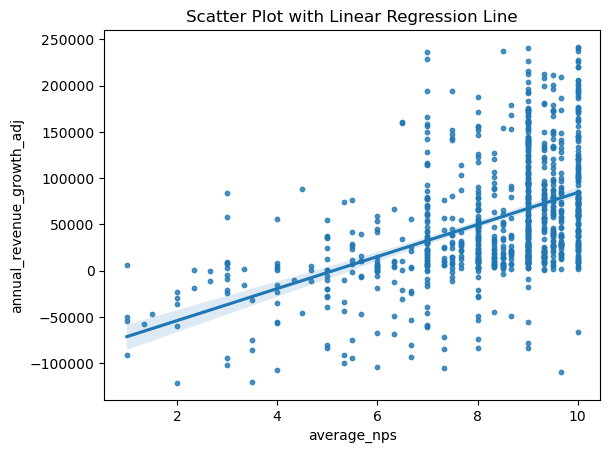

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have Seaborn installed
# If not, you can install it using: pip install seaborn

# Create a scatter plot with a linear regression line
sns.regplot(x='average_nps', y='annual_revenue_growth_adj', data=filtered_merged_df, scatter_kws={'s': 10})
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('average_nps')
plt.ylabel('annual_revenue_growth_adj')
plt.show()

In [107]:
# Merge PartnerInvolvement DataFrames on 'customer number'
merged_df_PI = pd.merge(filtered_merged_df, PI_df[['Customer Number', 'Partner Involvment']], on='Customer Number', how='left')

# Display the merged DataFrame
merged_df_PI.head(10)

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth,annual_revenue_growth_adj,average_nps,Partner Involvment
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50,84.0,33.600000,355667.76,142267.104000,9.000000,Yes
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,15.0,6.666667,63873.00,28388.000000,9.000000,Yes
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-23.0,-18.400000,-71157.86,-56926.288000,4.000000,Yes
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,31.0,20.666667,90158.85,60105.900000,10.000000,Yes
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,54.0,36.000000,208452.96,138968.640000,9.000000,Yes
5,CUST0006,SME,Manufacturing and Natural Resources,2019-02-01,116604,124766.28,6,1.50,7.0,4.666667,8162.28,5441.520000,7.000000,No
6,CUST0007,Very Large Enterprise,Government,2018-01-01,734711,830223.43,10,2.50,13.0,5.200000,95512.43,38204.972000,9.000000,No
7,CUST0008,SME,Business and Consumer Services,2017-01-01,75695,137764.90,14,3.50,82.0,23.428571,62069.90,17734.257143,9.666667,No
8,CUST0010,SME,Energy and Utilities,2018-04-01,225103,382675.10,9,2.25,70.0,31.111111,157572.10,70032.044444,9.500000,Yes
9,CUST0011,SME,Manufacturing and Natural Resources,2018-03-01,200131,228149.34,10,2.50,14.0,5.600000,28018.34,11207.336000,7.000000,No


In [109]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import pointbiserialr

#'Knowledge Event', 'NowForum Event', and 'OtherEvents Event' are binary categorical variables

# Create a DataFrame with the relevant columns
df = merged_df_PI[['annual_revenue_growth_adj', 'Partner Involvment']]

# Map categorical values to numeric (0 or 1)
df['Partner Involvment'] = df['Partner Involvment'].map({'No': 0, 'Yes': 1})

# Drop rows with missing values
df = df.dropna()

# Calculate point-biserial correlation and p-values
corr_knowledge, p_value_knowledge = pointbiserialr(df['Partner Involvment'], df['annual_revenue_growth_adj'])
print(f"Point-biserial correlation between Partner Involvment and annual_revenue_growth_adj: {corr_knowledge:.4f}, p-value: {p_value_knowledge:.4f}")



Point-biserial correlation between Partner Involvment and annual_revenue_growth_adj: 0.0418, p-value: 0.2071


/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2986407483.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Partner Involvment'] = df['Partner Involvment'].map({'No': 0, 'Yes': 1})


In [116]:
print(PA_df['Product Adoption'].dtype)

float64


In [117]:
PA_df['Product Adoption'] = PA_df['Product Adoption'].astype(str).str.rstrip('%').astype('float') / 100.0


In [118]:
print(PA_df['Product Adoption'].isnull().any())

False


In [120]:
import pandas as pd

# Assuming PA_df is your DataFrame and 'Product Adoption' is the column
PA_df['Product Adoption'] = PA_df['Product Adoption'].astype(str).str.rstrip('%').astype('float') / 100.0


In [121]:
PA_df['Product Adoption'].head()

0    2.200000e-07
1    1.000000e-08
2    5.700000e-07
3    5.000000e-07
4    9.200000e-07
Name: Product Adoption, dtype: float64

In [123]:
# Join with vu_df and select columns to bring from vu_df
filtered_merged_df = pd.merge(filtered_merged_df, vu_df[['Customer Number', 'Number of Version Upgrades by the Customer since they started']], on='Customer Number', how='left')

# Join with PA_df
filtered_merged_df = pd.merge(filtered_merged_df, PA_df[['Customer Number', 'Product Adoption']], on='Customer Number', how='left')


In [124]:
filtered_merged_df.head()

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth,annual_revenue_growth_adj,average_nps,Number of Version Upgrades by the Customer since they started,Product Adoption
0,CUST0001,Very Large Enterprise,Government,2018-01-01,423414,779081.76,10,2.50,84.0,33.600000,355667.76,142267.104,9.0,NaN,NaN
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,15.0,6.666667,63873.00,28388.000,9.0,3.0,2.200000e-07
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-23.0,-18.400000,-71157.86,-56926.288,4.0,2.0,1.000000e-08
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,31.0,20.666667,90158.85,60105.900,10.0,1.0,5.700000e-07
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,54.0,36.000000,208452.96,138968.640,9.0,2.0,5.000000e-07


In [129]:
# Drop rows where 'Number of Version Upgrades by the Customer since they started' is NaN
filtered_merged_df = filtered_merged_df.dropna(subset=['Number of Version Upgrades by the Customer since they started'])

In [130]:
filtered_merged_df.head()

,Customer Number,Customer Segment,Customer Industry,Customer Start Quarter with Aviato,Starting Yearly Subscription Revenue,Current (20-Q3) Yearly Subscription Revenue,quarters_since_start,years_since_start,annual_revenue_growth_perc,annual_revenue_growth_perc_adj,annual_revenue_growth,annual_revenue_growth_adj,average_nps,Number of Version Upgrades by the Customer since they started,Product Adoption
1,CUST0002,Large Enterprise,Retail and Wholesale,2018-04-01,425820,489693.00,9,2.25,15.0,6.666667,63873.00,28388.000,9.0,3.0,2.200000e-07
2,CUST0003,Large Enterprise,Healthcare and Life Sciences,2019-04-01,309382,238224.14,5,1.25,-23.0,-18.400000,-71157.86,-56926.288,4.0,2.0,1.000000e-08
3,CUST0004,Commercial,Retail and Wholesale,2019-01-01,290835,380993.85,6,1.50,31.0,20.666667,90158.85,60105.900,10.0,1.0,5.700000e-07
4,CUST0005,Commercial,Manufacturing and Natural Resources,2019-02-01,386024,594476.96,6,1.50,54.0,36.000000,208452.96,138968.640,9.0,2.0,5.000000e-07
5,CUST0006,SME,Manufacturing and Natural Resources,2019-02-01,116604,124766.28,6,1.50,7.0,4.666667,8162.28,5441.520,7.0,2.0,9.200000e-07


/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_6002/2510627216.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_merged_df.corr()


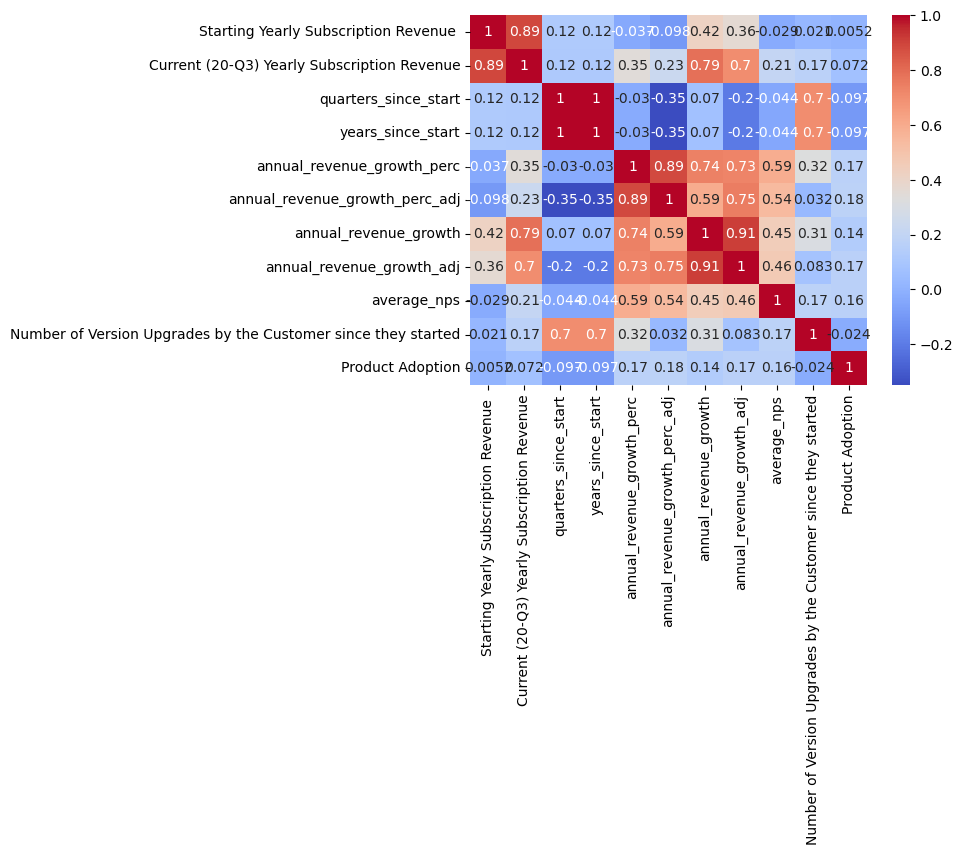

In [131]:
corr_matrix = filtered_merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [132]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Assuming you have a DataFrame 'df' with the provided dataset
# Replace 'df' with the actual name of your DataFrame

# Correlation analysis
correlation_coefficient, p_value = pearsonr(filtered_merged_df['Number of Version Upgrades by the Customer since they started'], filtered_merged_df['annual_revenue_growth_adj'])

# Display the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Regression analysis
X = sm.add_constant(filtered_merged_df['Number of Version Upgrades by the Customer since they started'])
y = filtered_merged_df['annual_revenue_growth_adj']

model = sm.OLS(y, X).fit()
print(model.summary())


Pearson Correlation Coefficient: 0.08334790602308612
P-value: 0.01644498944177351
                                OLS Regression Results                               
Dep. Variable:     annual_revenue_growth_adj   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     5.778
Date:                       Thu, 25 Jan 2024   Prob (F-statistic):             0.0164
Time:                               18:38:10   Log-Likelihood:                -10352.
No. Observations:                        828   AIC:                         2.071e+04
Df Residuals:                            826   BIC:                         2.072e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                                          